In [1]:
pip install pandas openpyxl

In [154]:
import pandas as pd

data=pd.read_csv("C:\\Users\\lenovo\\OneDrive\\Documents\\M1\\S2\\python\\synthetic_ecommerce_data.csv")
display(data)


,Transaction_ID,Customer_ID,Product_ID,Transaction_Date,Units_Sold,Discount_Applied,Revenue,Clicks,Impressions,Conversion_Rate,Category,Region,Ad_CTR,Ad_CPC,Ad_Spend
0,8b460852-7c64-46fa-998b-b0976879d082,Customer_65,Product_224,2024-10-06,134,0.14,305.54,11,65,0.17,Electronics,Europe,0.0180,0.55,9.90
1,418612e7-8744-4ba3-bb0c-105b47e2a968,Customer_1910,Product_584,2024-10-29,109,0.30,1102.19,15,201,0.07,Home Appliances,Asia,0.1589,0.40,63.56
2,5bc3b98f-cb0c-4b12-947c-df8bbb35a73e,Customer_2306,Product_374,2024-04-04,116,0.04,471.29,16,199,0.08,Toys,Asia,0.0596,1.50,89.40
3,28fb67c8-e8c0-447a-841c-f760730de0eb,Customer_17206,Product_220,2024-08-25,125,0.20,980.26,12,355,0.03,Clothing,Europe,0.0444,0.44,19.54
4,8bee087a-a8a9-45bb-89d7-04d1710f1b00,Customer_16033,Product_358,2024-05-05,132,0.07,803.76,44,355,0.12,Books,North America,0.1270,0.53,67.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,90320769-c92d-4142-b112-4bac46d44007,Customer_2613,Product_472,2024-04-21,179,0.11,255.11,41,428,0.10,Electronics,Europe,0.1073,1.48,158.80
99996,e91a3cfa-bd5b-475a-825d-6efe939ff974,Customer_19127,Product_787,2024-09-17,178,0.12,1302.60,6,363,0.02,Books,North America,0.1164,0.36,41.90
99997,b0e10e62-e7c4-4092-876a-12abc9ebe3e8,Customer_4685,Product_745,2024-10-23,212,0.26,491.36,5,419,0.01,Electronics,North America,0.1235,0.20,24.70
99998,97980811-e107-4369-888c-31cd8763471f,Customer_16377,Product_39,2024-01-03,180,0.09,598.91,41,12,3.42,Electronics,Europe,0.1566,0.96,150.34


In [13]:
#Revenu global de l'entreprise 


# Calcul du chiffre d'affaires total
ca_total = data['Revenue'].sum()

print("Le chiffre d'affaires total de l'entreprise est de : {:.2f} €".format(ca_total))

Le chiffre d'affaires total de l'entreprise est de : 55311081.07 €


In [15]:
#Analyse des achats des clients

#Top 10 des clients par dépenses
top10_clients = data.groupby('Customer_ID')['Revenue'].sum().sort_values(ascending=False).head(10)
print(top10_clients)

Customer_ID
Customer_2379     12021.14
Customer_18839    11207.58
Customer_3173     10849.05
Customer_10780    10784.89
Customer_10503    10634.27
Customer_11994    10523.24
Customer_16807    10499.72
Customer_5945     10280.72
Customer_16840    10018.70
Customer_2776      9998.02
Name: Revenue, dtype: float64


count    19865.000000
mean      2784.348405
std       1543.824278
min         11.140000
25%       1643.070000
50%       2589.290000
75%       3706.170000
max      12021.140000
Name: Revenue, dtype: float64

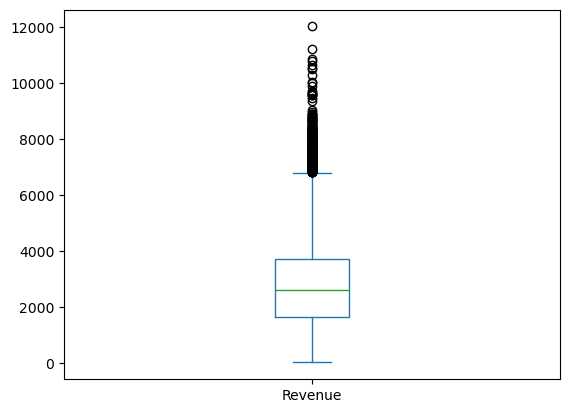

In [78]:
#depenses par client semble homogene, on realise une boite a moustache pour etudier la dispersion du montant d'achats par client
import numpy as np
top_clients = data.groupby('Customer_ID')['Revenue'].sum().sort_values(ascending=False)
top_clients.plot.box()
top_clients.describe()
#disparité entre  clients dépensant moins de 4000 € et ceux étant au dessus de 6000€




In [148]:
#On va isoler ces derniers et constituer un premier groupe avec nos clients standards dépensant moins de 6000€
clients_stand=top_clients[top_clients<=4000]
print("Il y a ",clients_stand.count(),"clients standards, soit {:.2f}% de nos clients.".format(clients_stand.count()/top_clients.count()*100))

Il y a  15905 clients standards, soit 80.07% de nos clients.


count     3960.000000
mean      5146.375018
std       1032.241788
min       4000.610000
25%       4368.287500
50%       4851.220000
75%       5631.247500
max      12021.140000
Name: Revenue, dtype: float64

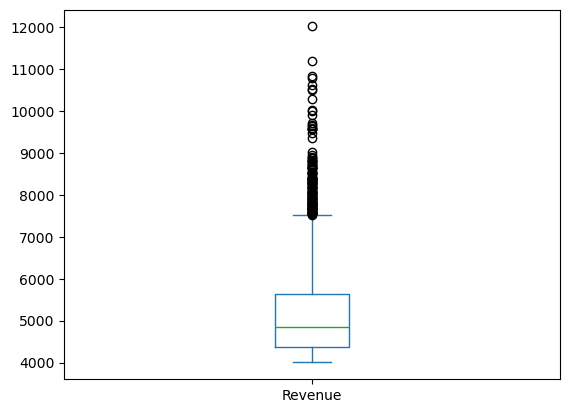

In [96]:
haut_clients=top_clients[top_clients>=4000]
haut_clients.plot.box()
haut_clients.describe()
# Il y a 698 clients au dessus de 6000€ d'achats, allant de 6002,19€ à 12021€. Ce deuxième groupe va constituer nos clients réguliers.
#au sein même de cette catégorie, il existe une dispartié entre ceux qui ont dépensé plus ou moins de 7500€


In [186]:
clients_inter=top_clients[(top_clients>4000)&(top_clients<8500)]
print("Il y a ",clients_inter.count(),"clients intermédiaires, soit {:.2f}% de nos clients.".format(clients_inter.count()/top_clients.count()*100))


Il y a  3914 clients intermédiaires, soit 19.70% de nos clients.


Customer_ID
Customer_17154    8438.55
Customer_1329     8425.05
Customer_19844    8412.90
Customer_12641    8400.61
Customer_5281     8391.14
                   ...   
Customer_17986    4001.41
Customer_14890    4000.96
Customer_16059    4000.94
Customer_17354    4000.66
Customer_1116     4000.61
Name: Revenue, Length: 3914, dtype: float64

In [178]:
# On discerne une tendance d'achteurs ayant dépensé plus de 8500€ 
clients_premium=top_clients[top_clients>=8500]
print("Il y a ",clients_premium.count(),"clients premium, soit {:.2f}% de nos clients.".format(clients_premium.count()/top_clients.count()*100))


Il y a  46 clients premium, soit 0.23% de nos clients.


Customer_ID
Customer_2379     12021.14
Customer_18839    11207.58
Customer_3173     10849.05
Customer_10780    10784.89
Customer_10503    10634.27
Customer_11994    10523.24
Customer_16807    10499.72
Customer_5945     10280.72
Customer_16840    10018.70
Customer_2776      9998.02
Customer_6607      9901.76
Customer_4968      9714.38
Customer_15573     9664.53
Customer_9217      9636.60
Customer_16122     9590.22
Customer_8385      9566.53
Customer_1288      9564.88
Customer_12054     9563.92
Customer_7322      9482.50
Customer_16743     9348.48
Customer_18212     9032.29
Customer_540       8953.63
Customer_18564     8901.49
Customer_17974     8890.67
Customer_166       8883.21
Customer_14694     8841.29
Customer_18896     8820.98
Customer_4289      8802.75
Customer_9216      8798.72
Customer_1994      8795.23
Customer_2393      8739.60
Customer_19228     8727.81
Customer_4036      8716.23
Customer_10588     8694.46
Customer_14932     8674.78
Customer_16075     8672.18
Customer_4726   

<Axes: title={'center': "Part de clientèle en fonction du montant d'achat cumulé"}>

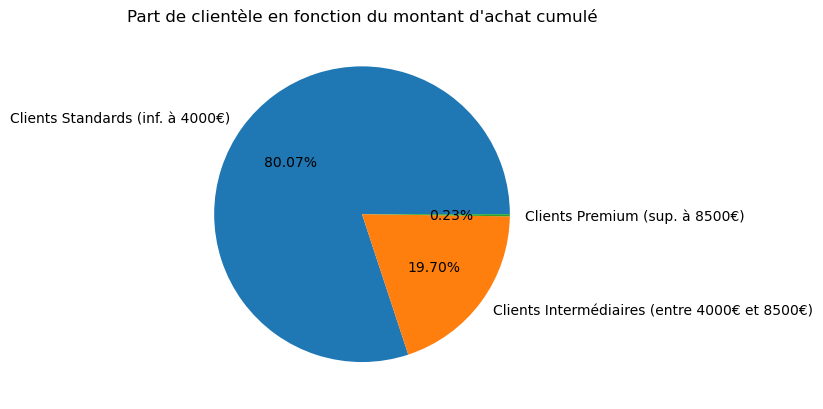

In [150]:
#camembert 
import matplotlib as plt
valeurs=pd.Series([clients_stand.count(),clients_inter.count(),clients_premium.count()], index=["Clients Standards (inf. à 4000€)", 
                                                                                                "Clients Intermédiaires (entre 4000€ et 8500€)", 
                                                                                                "Clients Premium (sup. à 8500€)"])
valeurs.plot.pie(autopct="%1.2f%%", title="Part de clientèle en fonction du montant d'achat cumulé")


<Axes: title={'center': "Part de la catégorie de clients dans le chiffre d'affaires total"}>

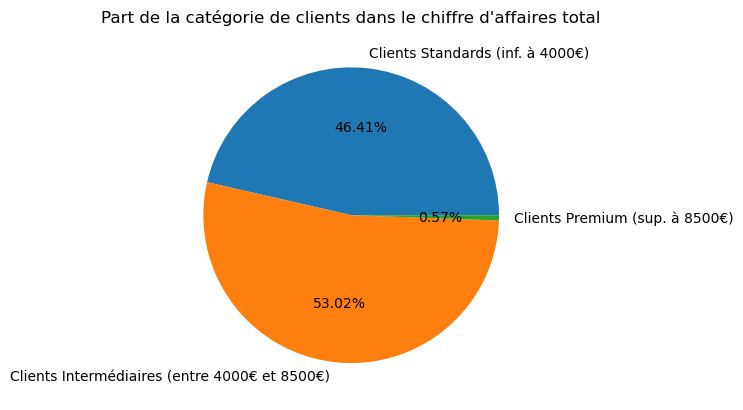

In [152]:
#poids de chaque catégorie clients dans le CA total

poids_stand=clients_stand.sum()/ca_total*100
poids_inter=clients_inter.sum()/ca_total*100
poids_premium=clients_premium.sum()/ca_total*100

valeurs2= pd.Series([poids_stand,poids_inter,poids_premium],index=["Clients Standards (inf. à 4000€)", 
                                                                                                "Clients Intermédiaires (entre 4000€ et 8500€)", 
                                                                                                "Clients Premium (sup. à 8500€)"])
valeurs2.plot.pie(autopct ="%1.2f%%",title ="Part de la catégorie de clients dans le chiffre d'affaires total")


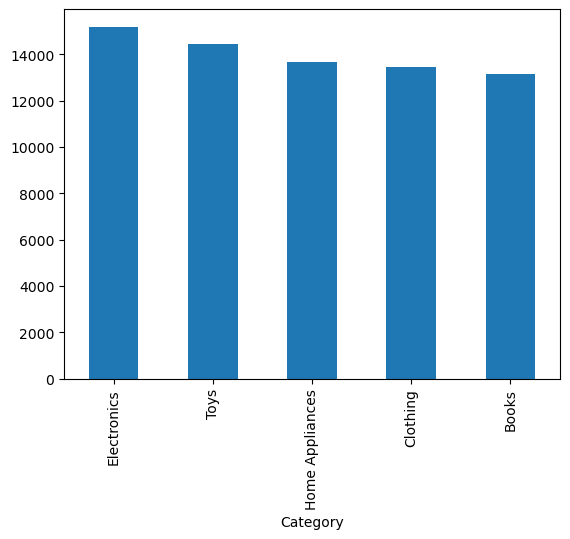

In [198]:
#categorie de produit par categorie de clients
categorie=data[["Customer_ID","Category"]]


#standards par categorie
cat_stand=pd.merge(clients_stand,categorie,left_on="Customer_ID", right_on="Customer_ID")
rep_cat_stand=cat_stand["Category"].value_counts()
rep_cat_stand.plot.bar(title="Nombre de produits achetés par catégories chez les clients standards")
#pas de tendance forte (1-electronics 2-toys 3-home 4-Clothing 5-books)
#hyp : les menages les moins aisés privilégient les divertissements aux livres






<Axes: title={'center': 'Nombre de produits achetés par catégories chez les clients intermédiaires'}, xlabel='Category'>

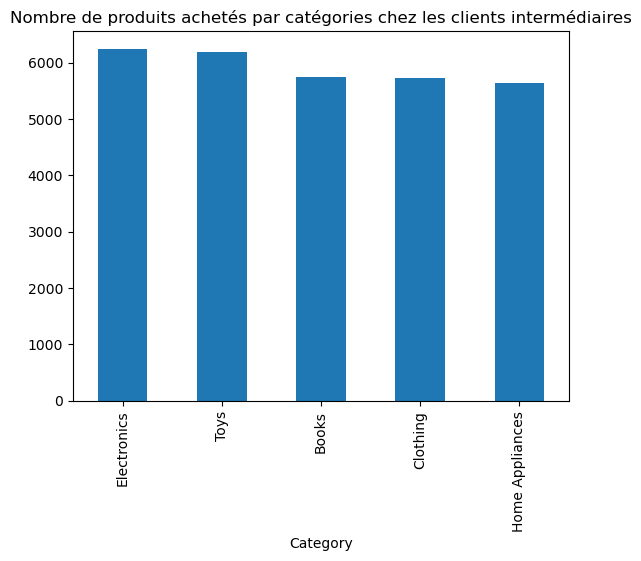

In [200]:
#intermeédiaires par categorie
cat_inter=pd.merge(clients_inter,categorie,left_on="Customer_ID", right_on="Customer_ID")
rep_cat_inter=cat_inter["Category"].value_counts()
rep_cat_inter.plot.bar(title="Nombre de produits achetés par catégories chez les clients intermédiaires")
#electronics et toys devant, le reste ex-aequo


<Axes: title={'center': 'Nombre de produits achetés par catégories chez les clients premium'}, xlabel='Category'>

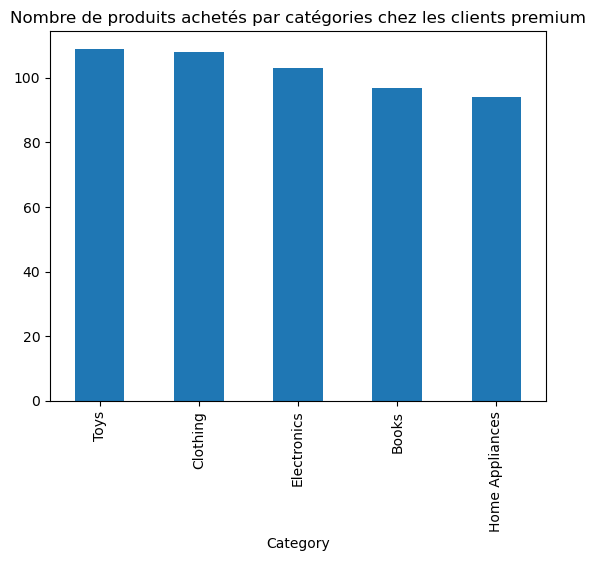

In [218]:
#premium par catgeorie 
cat_premium=pd.merge(clients_premium,categorie,left_on="Customer_ID", right_on="Customer_ID")
rep_cat_premium=cat_premium["Category"].value_counts()
rep_cat_premium.plot.bar(title="Nombre de produits achetés par catégories chez les clients premium")
#Classement différent, les jouets et les habits devant


<Axes: title={'center': 'Répartition des ventes par type de produit (en %)'}, ylabel='Units_Sold'>

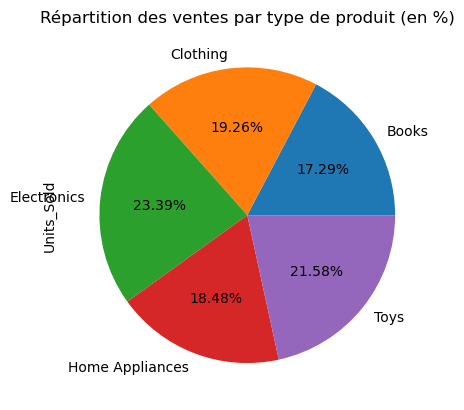

In [234]:
# Regrouper les ventes totales par catégorie
ventes_par_categorie = data.groupby('Category')['Units_Sold'].sum()
#camembert
ventes_par_categorie.plot.pie(labels=ventes_par_categorie.index, title="Répartition des ventes par type de produit (en %)",autopct='%1.2f%%')


                Revenue  count
Customer_ID                   
Customer_3469   3999.75      4
Customer_3060   3999.68      5
Customer_13032  3999.61      7
Customer_19176  3999.24      5
Customer_12148  3998.17      7
...                 ...    ...
Customer_2684     22.87      1
Customer_2526     22.54      1
Customer_7919     21.52      1
Customer_14022    12.13      1
Customer_4516     11.14      1

[15905 rows x 2 columns]
Le nombre de transactions moyen chez les clients standards est de 4.40.
Le nombre de transactions moyen chez les clients intermédiaires est de 7.55.
Le nombre de transactions moyen chez les clients premium est de 11.11.


<Axes: title={'center': 'Nombre de transactions moyen par catégorie de client'}>

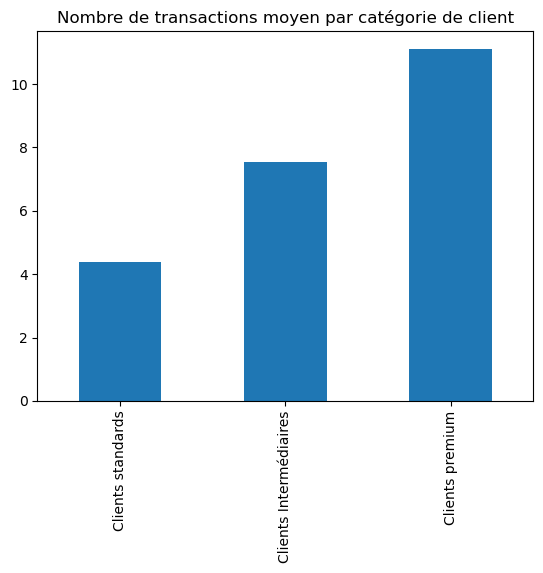

In [318]:
#frequence 
trans_par_clients=data["Customer_ID"].value_counts()
trans_par_clients.describe()
trans_stand=pd.merge(clients_stand, trans_par_clients, left_on="Customer_ID", right_on="Customer_ID")
print(trans_stand)
moy_trans_stand=trans_stand["count"].mean()
print("Le nombre de transactions moyen chez les clients standards est de {:.2f}.".format(moy_trans_stand))
trans_inter=pd.merge(clients_inter, trans_par_clients, left_on="Customer_ID", right_on="Customer_ID")
moy_trans_inter=trans_inter["count"].mean()
print("Le nombre de transactions moyen chez les clients intermédiaires est de {:.2f}.".format(moy_trans_inter))
trans_premium=pd.merge(clients_premium, trans_par_clients, left_on="Customer_ID", right_on="Customer_ID")
moy_trans_premium=trans_premium["count"].mean()
print("Le nombre de transactions moyen chez les clients premium est de {:.2f}.".format(moy_trans_premium))


valeurs3=pd.Series([moy_trans_stand,moy_trans_inter,moy_trans_premium], 
                   index=["Clients standards", "Clients Intermédiaires", "Clients premium"])
valeurs3.plot.bar(title="Nombre de transactions moyen par catégorie de client")

Le taux de conversion moyen est de 14.52%.
Le taux de conversion moyen chez les clients standards est de 14.52%.
Le taux de conversion moyen chez les clients intermédiaires est de 14.51%.
Le taux de conversion moyen chez les clients premium est de 15.03%.


<Axes: title={'center': 'Taux de conversion moyen par catégorie de client'}>

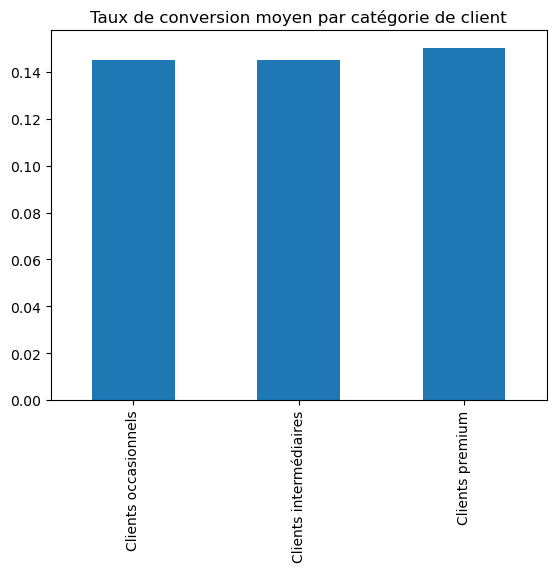

In [342]:
#taux de conversion, il y a des taux de conversions supérieurs à 1 dans la base de données
taux_normaux=data[data["Conversion_Rate"]<=1]
taux_moyen=taux_normaux["Conversion_Rate"]
print("Le taux de conversion moyen est de {:.2f}%.".format(taux_moyen.mean()*100))
taux_stand=pd.merge(clients_stand,taux_normaux, left_on="Customer_ID", right_on="Customer_ID")
taux_inter=pd.merge(clients_inter,taux_normaux, left_on="Customer_ID", right_on="Customer_ID")
taux_premium=pd.merge(clients_premium,taux_normaux, left_on="Customer_ID", right_on="Customer_ID")

moy_taux_stand=taux_stand["Conversion_Rate"].mean()
print("Le taux de conversion moyen chez les clients standards est de {:.2f}%.".format(moy_taux_stand.mean()*100))
moy_taux_inter=taux_inter["Conversion_Rate"].mean()
print("Le taux de conversion moyen chez les clients intermédiaires est de {:.2f}%.".format(moy_taux_inter.mean()*100))
moy_taux_premium=taux_premium["Conversion_Rate"].mean()
print("Le taux de conversion moyen chez les clients premium est de {:.2f}%.".format(moy_taux_premium.mean()*100))


valeurs4=pd.Series([moy_taux_stand,moy_taux_inter,moy_taux_premium], 
                   index =["Clients occasionnels","Clients intermédiaires", "Clients premium"])
valeurs4.plot.bar(title="Taux de conversion moyen par catégorie de client")




In [286]:
#nombre de clics
clics=data["Clicks"]
clics.describe()
print("Le nombre moyen de clics est de {:.2f}% ".format(clics.mean()))
clics_cat=data.groupby("Category")["Clicks"].mean()
print(clics_cat)

Le nombre moyen de clics est de 24.54% 
Category
Books              24.529570
Clothing           24.594616
Electronics        24.399201
Home Appliances    24.581801
Toys               24.601763
Name: Clicks, dtype: float64


In [288]:
#Quantités vendues par transaction
quant=data["Units_Sold"]
quant.describe()


count    100000.000000
mean        128.328580
std          49.679873
min          51.000000
25%          84.000000
50%         127.000000
75%         166.000000
max         716.000000
Name: Units_Sold, dtype: float64

In [348]:
region=data["Region"].value_counts()
print(region)
revenue_region=data.groupby("Region")["Revenue"].sum()
print(revenue_region)
#pas d'incidence de la region 

Region
Asia             33472
Europe           33265
North America    33263
Name: count, dtype: int64
Region
Asia             18492871.13
Europe           18398981.33
North America    18419228.61
Name: Revenue, dtype: float64


                  Units_Sold  Discount_Applied   Revenue    Clicks  \
Units_Sold          1.000000         -0.000895  0.044226  0.003540   
Discount_Applied   -0.000895          1.000000 -0.129227 -0.002911   
Revenue             0.044226         -0.129227  1.000000  0.005784   
Clicks              0.003540         -0.002911  0.005784  1.000000   
Impressions         0.001255         -0.003697  0.004750  0.002034   
Conversion_Rate     0.000653          0.001598 -0.002019  0.321004   
Ad_CTR              0.001044         -0.002839  0.009421  0.003740   
Ad_CPC             -0.001812          0.003104  0.002643 -0.005133   
Ad_Spend           -0.001615          0.000076  0.010418 -0.001375   

                  Impressions  Conversion_Rate    Ad_CTR    Ad_CPC  Ad_Spend  
Units_Sold           0.001255         0.000653  0.001044 -0.001812 -0.001615  
Discount_Applied    -0.003697         0.001598 -0.002839  0.003104  0.000076  
Revenue              0.004750        -0.002019  0.009421  0.00

<Axes: >

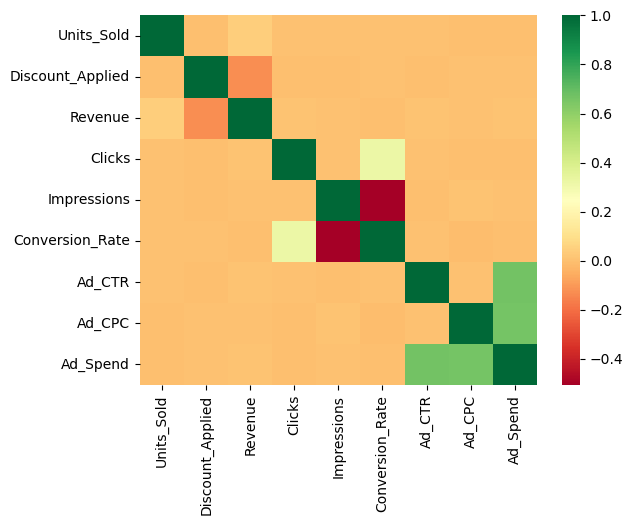

In [366]:
#matrice de correlation
corr=data.corr(numeric_only=True)
print(corr)
#heatmap
import seaborn as sns
sns.heatmap(corr,fmt=".2f", cmap="RdYlGn")

In [9]:
#Données en pourcentage 
import pandas as pd


df = pd.read_csv(r"C:\Users\Melanie\OneDrive\Documents\Devoir Python.csv")  

# Total du chiffre d'affaires global
total_revenu = df['Revenue'].sum()

# Top 3 clients par revenu
revenu_par_client = df.groupby('Customer_ID')['Revenue'].sum()
top3 = revenu_par_client.sort_values(ascending=False).head(3)

# Somme des revenus des top 3
revenu_top3 = top3.sum()

# Pourcentage de contribution
pourcentage_top3 = (revenu_top3 / total_revenu) * 100

# Résultat
print("Revenu total :", total_revenu)
print("Top 3 clients :", top3)
print("Contribution des top 3 clients : {:.2f}% du revenu total".format(pourcentage_top3))

Revenu total : 55311081.07000001
Top 3 clients : Customer_ID
Customer_2379     12021.14
Customer_18839    11207.58
Customer_3173     10849.05
Name: Revenue, dtype: float64
Contribution des top 3 clients : 0.06% du revenu total


In [11]:
#Nombre totale de ventes de produit 
import pandas as pd


df = pd.read_csv(r"C:\Users\Melanie\OneDrive\Documents\Devoir Python.csv")  

# Calcul du nombre total d'unités vendues
total_ventes = df['Units_Sold'].sum()

# Affichage
print("📦 Nombre total de produits vendus :", total_ventes)

📦 Nombre total de produits vendus : 12832858


In [13]:
#Produit avec des quantités vendues supérieures a la moyenne
moyenne_quantite = df['Units_Sold'].mean()
produits_quantites = df.groupby('Product_ID')['Units_Sold'].sum()
produits_sup_moyenne = produits_quantites[produits_quantites > moyenne_quantite]
print(produits_sup_moyenne)

Product_ID
Product_1       15323
Product_10      15951
Product_100     13484
Product_1000    12094
Product_101     13366
                ...  
Product_995     13272
Product_996     10937
Product_997     15027
Product_998     15822
Product_999     11381
Name: Units_Sold, Length: 1000, dtype: int64


In [15]:
# En euros
import pandas as pd


df = pd.read_csv(r"C:\Users\Melanie\OneDrive\Documents\Devoir Python.csv")  

# Calcul de la quantité moyenne vendue par produit
quantites_par_produit = df.groupby('Product_ID')['Units_Sold'].sum()
moyenne_quantite = quantites_par_produit.mean()

# Identifier les produits avec des quantités vendues > moyenne
produits_au_dessus = quantites_par_produit[quantites_par_produit > moyenne_quantite].index

# Filtrer les lignes du dataframe qui concernent ces produits
df_produits_au_dessus = df[df['Product_ID'].isin(produits_au_dessus)]

# Calcul du chiffre d'affaires généré par ces produits
ca_produits_au_dessus = df_produits_au_dessus['Revenue'].sum()

# Affichage
print("💸 Chiffre d'affaires généré par les produits avec des ventes supérieures à la moyenne : {:.2f} €".format(ca_produits_au_dessus))

💸 Chiffre d'affaires généré par les produits avec des ventes supérieures à la moyenne : 27117833.33 €


In [17]:
#Lignes de produits(catégories) avec ventes supérieurs a la  moyenne
ventes_par_categorie = df.groupby('Category')['Revenue'].sum()
mediane_ventes = ventes_par_categorie.median()
categories_sup_mediane = ventes_par_categorie[ventes_par_categorie > mediane_ventes]
print(categories_sup_mediane)

Category
Books          11195311.88
Electronics    11326820.25
Name: Revenue, dtype: float64


In [19]:
#clients qui ont acheté chaque année 
# Convertir les dates
df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'])
df['Year'] = df['Transaction_Date'].dt.year

# Liste des années dans les données
toutes_annees = set(df['Year'].unique())
print(toutes_annees)

# Clients présents toutes les années
clients_par_annee = df.groupby('Customer_ID')['Year'].apply(set)
clients_fideles = clients_par_annee[clients_par_annee.apply(lambda x: toutes_annees.issubset(x))]

#print(clients_fideles.index.tolist())

['Customer_10', 'Customer_100', 'Customer_10001', 'Customer_10003', 'Customer_1001', 'Customer_10010', 'Customer_10016', 'Customer_10020', 'Customer_10023', 'Customer_10029', 'Customer_10031', 'Customer_10034', 'Customer_10036', 'Customer_10037', 'Customer_10038', 'Customer_10055', 'Customer_1006', 'Customer_10060', 'Customer_10061', 'Customer_10069', 'Customer_10070', 'Customer_10074', 'Customer_10077', 'Customer_1008', 'Customer_10083', 'Customer_10085', 'Customer_10089', 'Customer_10090', 'Customer_10094', 'Customer_10095', 'Customer_10096', 'Customer_10097', 'Customer_10099', 'Customer_10103', 'Customer_10106', 'Customer_10108', 'Customer_1011', 'Customer_10110', 'Customer_10111', 'Customer_10114', 'Customer_10119', 'Customer_1012', 'Customer_10129', 'Customer_10130', 'Customer_10137', 'Customer_10138', 'Customer_10139', 'Customer_10140', 'Customer_10144', 'Customer_10145', 'Customer_10147', 'Customer_10150', 'Customer_10154', 'Customer_10157', 'Customer_10158', 'Customer_10161', '

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


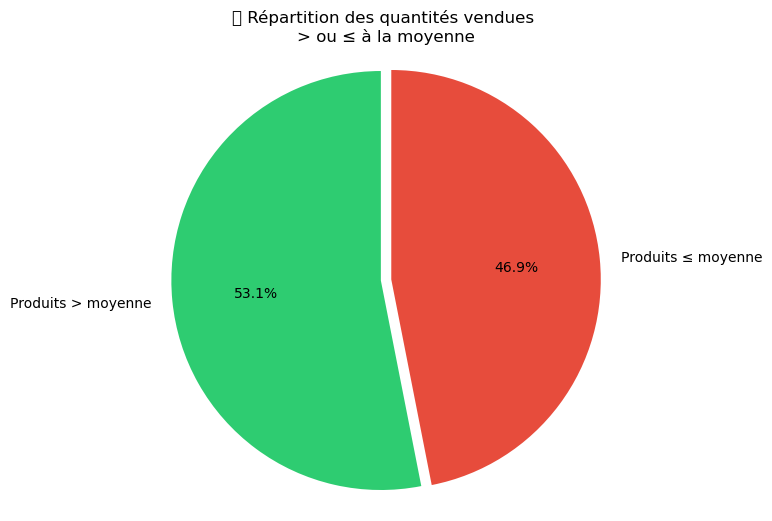

In [23]:
# graphique qui compare les produit les plus vendues vs les moins vendues 
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv(r"C:\Users\Melanie\OneDrive\Documents\Devoir Python.csv")  

# Quantité totale vendue par produit
quantites_par_produit = df.groupby('Product_ID')['Units_Sold'].sum()

# Moyenne des quantités
moyenne_quantite = quantites_par_produit.mean()

# Produits avec ventes > moyenne
quantites_sup_moyenne = quantites_par_produit[quantites_par_produit > moyenne_quantite].sum()

# Produits avec ventes ≤ moyenne
quantites_inferieure_ou_egale = quantites_par_produit[quantites_par_produit <= moyenne_quantite].sum()

# Données pour le camembert
labels = ['Produits > moyenne', 'Produits ≤ moyenne']
valeurs = [quantites_sup_moyenne, quantites_inferieure_ou_egale]
colors = ['#2ecc71', '#e74c3c']

# Création du graphique
plt.figure(figsize=(6,6))
plt.pie(valeurs, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90, explode=(0.05, 0))
plt.title("🔍 Répartition des quantités vendues \n> ou ≤ à la moyenne")
plt.axis('equal')  
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


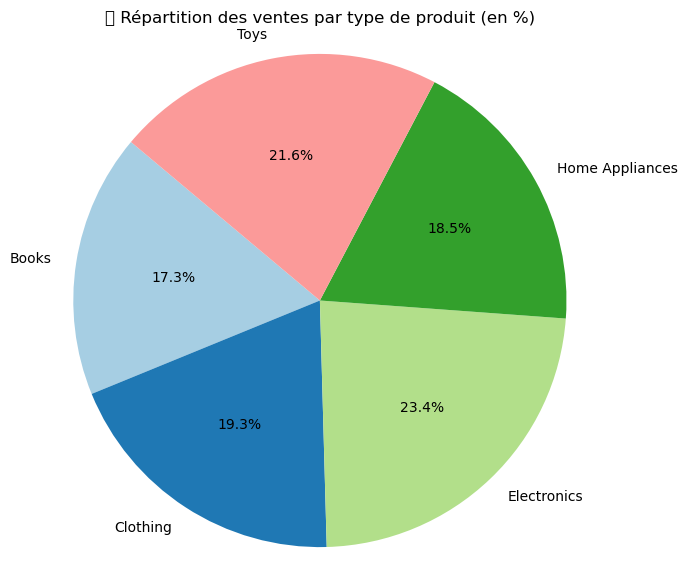

In [25]:
#Pour aller plus loin, on peut visualiser les données par type de produit vendu 
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv(r"C:\Users\Melanie\OneDrive\Documents\Devoir Python.csv")  

# Regrouper les ventes totales par catégorie
ventes_par_categorie = df.groupby('Category')['Units_Sold'].sum()

# Création du camembert
plt.figure(figsize=(7,7))
colors = plt.cm.Paired.colors  
plt.pie(ventes_par_categorie, labels=ventes_par_categorie.index, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title("📦 Répartition des ventes par type de produit (en %)")
plt.axis('equal')  
plt.show()